In [57]:
import zipfile
import os

if not os.path.exists('files'):
  with zipfile.ZipFile('files.zip', 'r') as zip_ref:
    zip_ref.extractall('files')

  with open('files/.gitignore', 'w') as file:
    file.write('*')

In [58]:
import tensorflow as tf

In [59]:
labels = ['bird', 'lion', 'owl', 'parrot', 'raccoon', 'skull', 'snail', 'snake', 'squirrel', 'tiger']

xs = []
ys = []

for idx, label in enumerate(labels):
  for (dirpath, dirnames, filenames) in os.walk(os.path.join('files', label)):
    for filename in filenames:
      file_content = tf.io.read_file(os.path.join(dirpath, filename))
      img_tensor = tf.io.decode_image(file_content, 1)
      xs.append(img_tensor)
      ys.append(idx)
    print('{} -> finished'.format(dirpath))
    break


files\bird -> finished
files\lion -> finished
files\owl -> finished
files\parrot -> finished
files\raccoon -> finished
files\skull -> finished
files\snail -> finished
files\snake -> finished
files\squirrel -> finished
files\tiger -> finished


In [60]:
xs = tf.convert_to_tensor(xs)
ys = tf.convert_to_tensor(ys)

In [61]:
import matplotlib.pyplot as plt

(87541, 28, 28, 1)


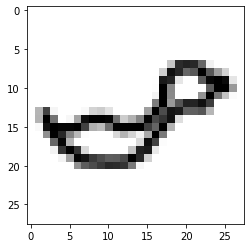

In [64]:
print(xs.shape)

plt.imshow(xs[0], cmap='gray')